c:\Users\Artur\Documents\Books\estudos\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


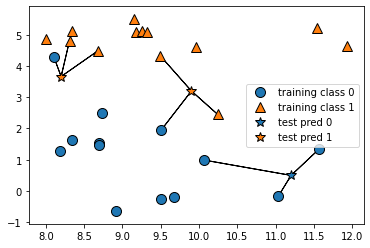

In [66]:
# k-Nearest Neighbors Classifier

# To make a prediction for a
# new data point, the algorithm finds the closest data points in the training dataset—its.
# More than one, we using voting to assign.
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [32]:
from sklearn.model_selection import train_test_split
import mglearn

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

c:\Users\Artur\Documents\Books\estudos\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)


0.8571428571428571

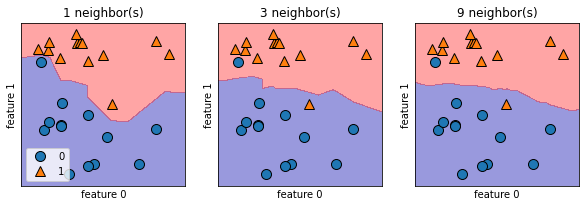

In [39]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

C:\Users\Artur\AppData\Local\Temp/ipykernel_11324/422977729.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(neighbors_settings, test_accuracy, 'k--', color='red', label="test accuracy")


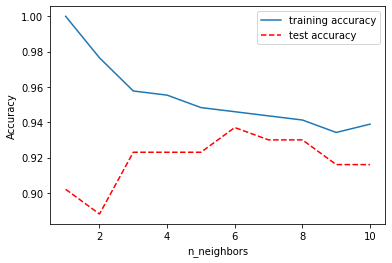

In [64]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones,
# stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, 'k--', color='red', label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
    




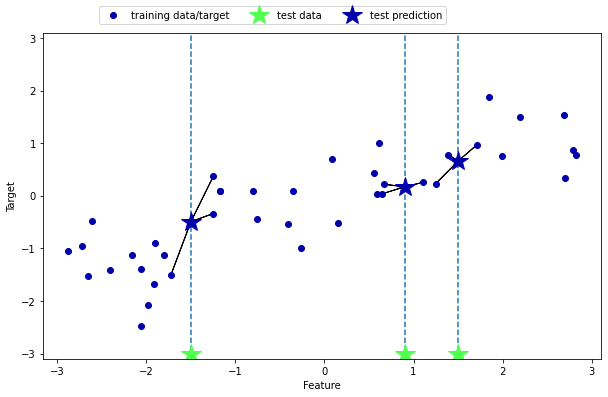

In [67]:
# k-Nearest Neighbors Regression

# The prediction using a single neighbor is just the target value of the nearest neighbor. 
#  When using multiple  nearest  neighbors,  the  prediction  is  the  average,  or  mean,  of  the  relevant neighbors.
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [84]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
reg.predict(X_test)

'''
We can also evaluate the model using the  score  method, which for regressors returns
the R 2  score. The R 2  score, also known as the coefficient of determination, is a meas‐
ure of goodness of a prediction for a regression model, and yields a score between 0
and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds
to a constant model that just predicts the mean of the training set responses,  y_train
'''
reg.score(X_test, y_test)


0.8344172446249605

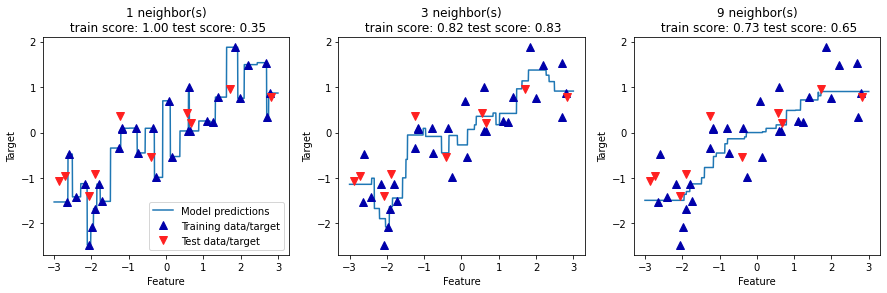

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

Weights: [0.39390555]
Intercept: -0.031804343026759746
0.6700890315075756
0.65933685968637


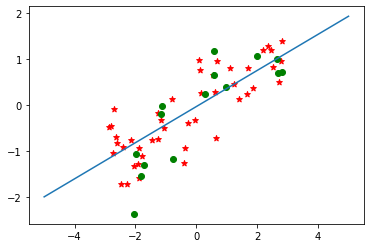

In [97]:
## Linear Regression
'''
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

Linear regression finds the parameters w and b that mini‐
mize the mean squared error between predictions and the true regression targets, y,
on  the  training  set.

The mean squared error (MSE) tells you how close a regression line is to a set of points.
It does this by taking the distances from the points to the regression line (these distances are the “errors”)
and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger
differences.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.
'''
from sklearn.linear_model import LinearRegression
import numpy as np
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

# coef_: The “slope” parameters (w), also called weights or coefficients
# intercept_:  offset or intercept (b) 
print(f'Weights: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

x_ = np.linspace(-5, 5, 100)
y_ = lr.coef_*x+lr.intercept_
plt.plot(x_, y_)
plt.scatter(X_train, y_train, color='red', marker='*')
plt.scatter(X_test, y_test, color='green', marker='o')

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))


In [104]:
## Boston Housing Example
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
# This discrepancy between performance on the training set and the test set is a clear sign of overfitting



Training set score: 0.95
Test set score: 0.61


c:\Users\Artur\Documents\Books\estudos\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21